# Sequence Analysis

## Tabel of content

1. [Sequence Analysis](#Sequence-Analysis)
   1. [Table of content](#Table-of-content)
2. [Basics](#Basics)
3. [Dotblots](#Dotblots)
   1. [Parameters Window Size and Allowed Error](#Parameters-Window-Size-and-Allowed-Error)
   2. [Substitution matrices](#Substitution-matrices)
   3. [Online tools to create Dotblots](#Online-tools-to-create-Dotblots)
      1. [Emboss dotmatcher](#Emboss-dotmatcher)
      2. [vector builder](#vector-builder)
      3. [dotlet](#dotlet)

# Basics

From a bioinformatic standpoint sequences are just big strings.

General limitations to keep in mind:

- normally we have no/limited knowledge about the sequences we work with
- most tools were developed with protein sequences in mind and were later changed to be able to work with nucleotides as well

Standard approach of sequence analysis

- start with a database search (FastA or BLAST)
- create a Multiple sequence Alignemtn (e.g. ClustalW)
- then do some pair-wise Alignment (e.g. Needleman-Wunsch)
- create a graphical comparison of your sequences using a dotblot

# Dotblots

Comparison of biological sequences. Both sequences are applied to the horizontal and vertical (top and left) axis of a diagram and matches between a column and a row are marked with a point (line) at the specific intersection

This is an example of a Sequence being compared to itself:

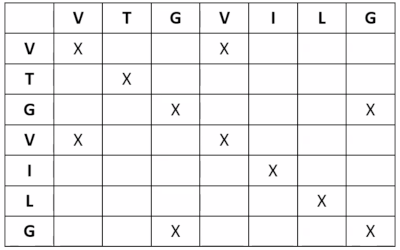

Meaning of the patterns (see powerpoint for example images):

- Long diagonal lines in a DotPlot refer to long stretches of identical (similar) letters in both sequences
- The most important diagonal is the main diagonal going from the top left corner to the bottom right corner, since it represents the letter by letter comparison of both sequences
- Breaks in these diagonals indicate “gaps”, that means regions were one sequence does not match the other sequence (This is mainly True if the diagonal continues afterwards)
- Multiple parallel diagonals refer to repeating parts of the sequences, e.g. domains
- Big blocks of Dots refer to “low complexity regions”, e.g. poly Alanine (AAAAAA) or repeats


## Parameters Window Size and Allowed Error

There are two main parameters that can be adjusted in Dotplots to reduce noise. Keep in mind that the Dotblot is usally done *after* the pairwise alignment, i.e. we already know identiy and similarity of the sequences

- Window size (W)
  - how many letters of both sequence to compare at once
  - goes frame by frame in the defined size and draws a line if all letters if the subset are identical
  - window sizes: protein 10-15, Nucleotides 30
  - all comparisons are done, i.e. I go one letter further in the column every comparison and compare all to the first chunk in the rows, then I again go over one step at a time in the columns and compare it all to the rows one letter down and so on. Comparisons done: orange, red, blue, green
  - if windows overlap the line is elongated

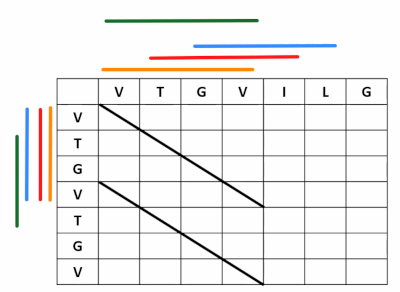

- Allowed Errors (E or S)
  - Number of mismatches allowed in Window size
  - can only be used in combination with window size
  - good starting values with window size 15, errors 4-5, then play around with it
  - Example: a windowsize of 4 with 1 Error allowed
     - the diagonal is elongated in this example since TGVI (columns) and TGVT (row) are also an accepted comparison wiht only one difference
     - since the two accepted windows overlap the diagonal is elongated

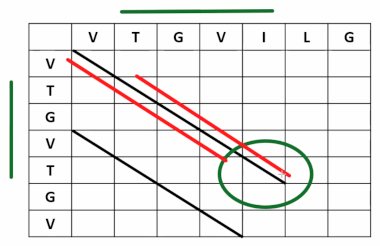

## Substitution matrices

To model similarities between amino acids that are different, but have the same properties, substitution matrices are used. The values in these matrices can be positive or ngeative, usually between -12 and 12.

- e.g. to compare TGVI and TGVT we compare T/T G/G V/V and I/T, we get a number for each comparison, sum them up and if the number is above a certain threshold we accept the comparison
- the thresholf for a window of 10 could e.g. be 23

## Online tools to create Dotblots

### Emboss dotmatcher

https://www.ebi.ac.uk/jdispatcher/seqstats/emboss_dotmatcher

- for protein or nucleotide sequences
- Parameters:
    - Matrix: which substitution matrix to use
       - BLOSUM62 is standard
       - The numbers refer to sequence identity, i.e. how identical are the two sequences we compare 
    - Window size (see above)
    - threshold of substitution sum

### vector builder

https://en.vectorbuilder.com/tool/sequence-dot-plot.html

- for nucleotide sequences only
- you have to copy and paste the sequence
- options:
   - Window size
   - mismatch limit
   - doesn't contain any Substritution matrices, since we only compare nucleotides
- output includes forward and reverse complement, this means that ince they are looked at from the beginning and once from the back, i.e. one sequence is looked at from the back and the other from the front
- also shows levels of homology in percent
- save image through right click

### dotlet

https://dotlet.vital-it.ch 

- click on the sequences and names to change them
- Window size and scoring matrix can be adjusted at the top
- at the bottom right are two scrollbars that have to be adjusted
   - the top one until the end of the blue bell curve (= histogramm of how often a certain score occurs) (~35%) (lower threshold)
   - the lower one until ca 60-70% (upper threshold)
   - these are approximate values that have to be adjusted
- includes a scrollable sequence viewer so we can immediately compare the sequences
   - can be accessed by moving the red bars in the plot or with the bars at the bottom
   - absolute matches are highlighted in the sequence viwer
- to download the image there is a print button at the top (this is broken at the moment, so just screenshot)
- based on Javascript





# Exercises

## Exercises 1-3

See powerpoint with results